<a href="https://colab.research.google.com/github/KeshriPooja/DataSet_Analysis/blob/master/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import *

import statsmodels.api as sm
from scipy import stats

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv('https://s3.us-west-2.amazonaws.com/public.gamelab.fun/dataset/salary_data.csv')

In [0]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [0]:
df.shape

(30, 2)

In [0]:
lmodel = LinearRegression()

In [0]:
lmodel.fit(df[['YearsExperience']],df[['Salary']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
lmodel.coef_

array([[9449.96232146]])

In [0]:
lmodel.intercept_

array([25792.20019867])

In [0]:
(df['YearsExperience'][1] * lmodel.coef_)+lmodel.intercept_

array([[38077.15121656]])

In [0]:
df['Predction']=lmodel.predict(df[['YearsExperience']])

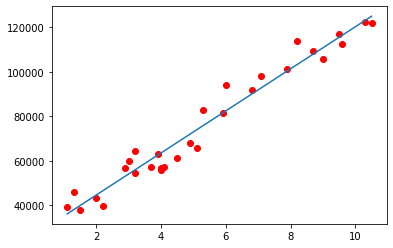

In [0]:
plt.scatter(df['YearsExperience'],df['Salary'],color='red')
plt.plot(df['YearsExperience'],df['Predction'])

In [0]:
df

,YearsExperience,Salary,Predction
0,1.1,39343,36187.158752
1,1.3,46205,38077.151217
2,1.5,37731,39967.143681
3,2.0,43525,44692.124842
4,2.2,39891,46582.117306
5,2.9,56642,53197.090931
6,3.0,60150,54142.087163
7,3.2,54445,56032.079627
8,3.2,64445,56032.079627
9,3.7,57189,60757.060788


In [0]:
r2_score(df['Salary'],df['Predction'])

0.9569566641435086

In [0]:
mean_squared_error(df['Salary'],df['Predction'])

31270951.722280964

In [0]:
mean_absolute_error(df['Salary'],df['Predction'])

4644.2012894435375

In [0]:
mean_squared_log_error(df['Salary'],df['Predction'])

0.00758414699615546

In [0]:
diamond = pd.read_csv('https://github.com/tidyverse/ggplot2/raw/master/data-raw/diamonds.csv')

In [0]:
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [0]:
diamond.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [0]:
diamond.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,53940,NaN,NaN,NaN,0.79794,0.474011,0.2,0.4,0.7,1.04,5.01
cut,53940,5,Ideal,21551,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,53940,7,G,11292,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,53940,8,SI1,13065,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,53940,NaN,NaN,NaN,61.7494,1.43262,43,61,61.8,62.5,79
table,53940,NaN,NaN,NaN,57.4572,2.23449,43,56,57,59,95
price,53940,NaN,NaN,NaN,3932.8,3989.44,326,950,2401,5324.25,18823
x,53940,NaN,NaN,NaN,5.73116,1.12176,0,4.71,5.7,6.54,10.74
y,53940,NaN,NaN,NaN,5.73453,1.14213,0,4.72,5.71,6.54,58.9
z,53940,NaN,NaN,NaN,3.53873,0.705699,0,2.91,3.53,4.04,31.8


In [0]:
diamond.corr()

,carat,depth,table,price,x,y,z,cutmap
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387,-0.134967
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924,-0.218055
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929,-0.433405
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249,-0.053491
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772,-0.125565
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006,-0.121462
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000,-0.149323
cutmap,-0.134967,-0.218055,-0.433405,-0.053491,-0.125565,-0.121462,-0.149323,1.000000


In [0]:
diamond.cut.value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [0]:
cutmap={'Fair':1,'Good':2,'Very Good': 3,'Premium':4,'Ideal':5}

In [0]:
diamond['cutmap']=diamond['cut'].replace(cutmap)

In [0]:
diamond.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z', 'cutmap'],
      dtype='object')

In [0]:
input_col=['carat',  'depth', 'table','cutmap']
out_col='price'

In [0]:
lmodel2=LinearRegression()

In [0]:
lmodel2.fit(diamond[input_col],diamond[out_col])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
lmodel2.predict(diamond[input_col])

array([-175.89743686, -680.7724489 , -831.67938532, ..., 2754.35069712,
       4481.97141828, 3848.9443307 ])

In [0]:
lmodel2.coef_

array([7870.23373225,  -96.6853903 ,  -54.37146986,  185.60668174])

In [0]:
lmodel2.intercept_

6022.49774172154

In [0]:
r2_score(diamond[out_col],lmodel2.predict(diamond[input_col]))

0.8555117453047179

In [0]:

X = sm.add_constant(diamond[input_col])
Y = diamond[out_col]